# Task 2
 
CREDIT CARD FRAUD DETECTION

Build a machine learning model to identify fraudulent credit card transactions.
Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
Evaluate the model'

s performance using metrics like precision, recall,

and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Dataset
data = pd.read_csv(r"E:\Project of DS\Codsoft project\creditcard\creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Checking the missing values 
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Check Class Distribution

In [16]:
# Check for and count duplicated rows
duplicated_count = data.duplicated().sum()
duplicated_count

1081

In [18]:
# remove duplicates
data = data.drop_duplicates(keep='first')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2881714084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data = data, palette = 'viridis')


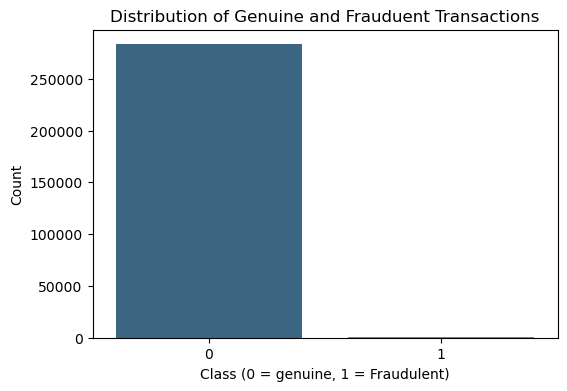

In [20]:
#ploting the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data = data, palette = 'viridis')
plt.title('Distribution of Genuine and Frauduent Transactions')
plt.xlabel('Class (0 = genuine, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

Data Normaliztion(Standerdization)

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
#Standaedizing the Amount and Time Columns
data['scaled_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1,1))

Drop Redundant Columns

In [28]:
data.drop(['Amount','Time'], axis = 1, inplace = True)

In [30]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


Viualizing Relaionship Between Feature and Target

<Axes: ylabel='scaled_amount'>

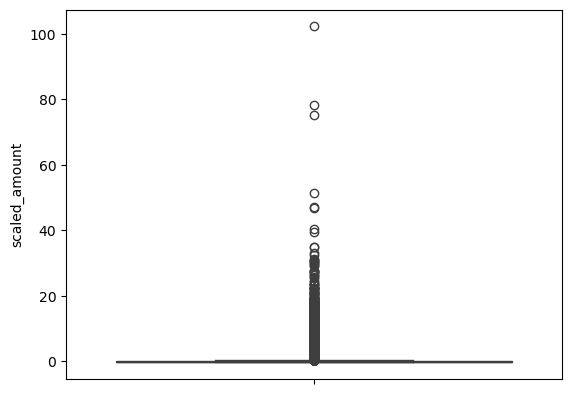

In [76]:
# Scaling 'Amount' column and plotting boxplot to check for any ourliers
scaler = StandardScaler()

data['scaled_amount'] = scaler.fit_transform(data[['scaled_amount']])

sns.boxplot(data['scaled_amount'])

In [78]:
# counting outliers
outliers = data['scaled_amount'] > 3 
outliers.count()

283726

In [84]:
#dropping outliers
class_count = data['scaled_amount']=data['scaled_amount'] < 3 
print(class_count)

0         True
1         True
2         True
3         True
4         True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Name: scaled_amount, Length: 283726, dtype: bool


In [88]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

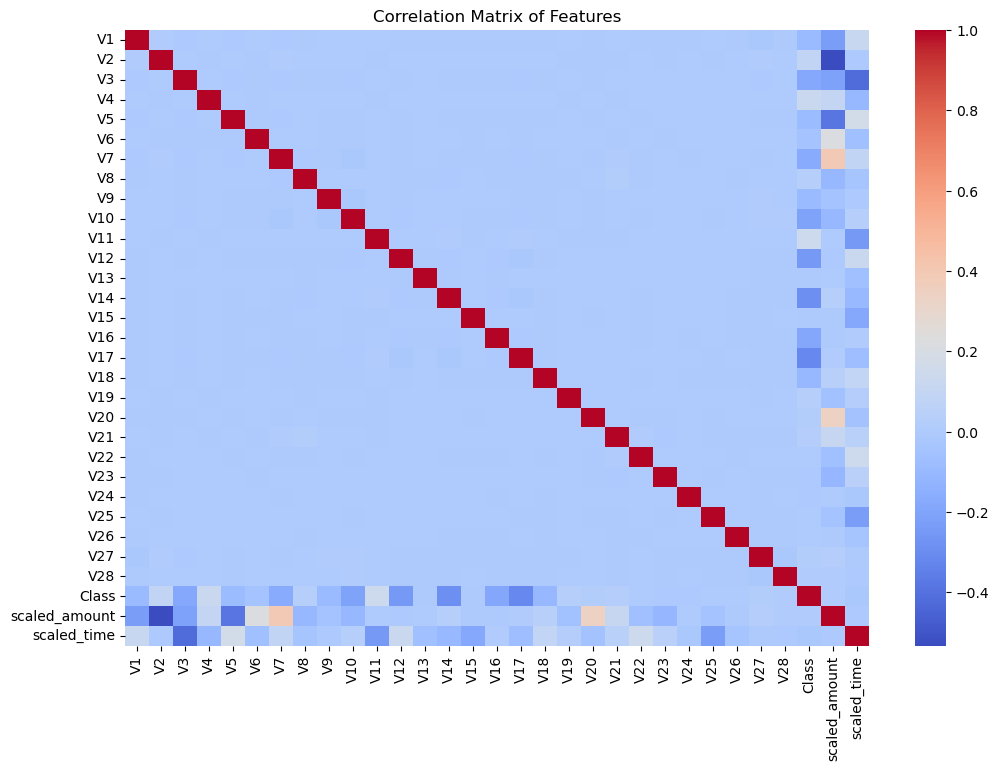

In [33]:
#Correlation Metrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 0], label = 'Genuine', shade = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 1], label = 'Fraudulent', shade = True)


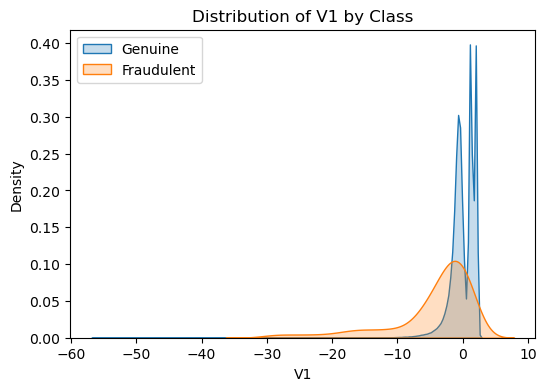

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 0], label = 'Genuine', shade = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 1], label = 'Fraudulent', shade = True)


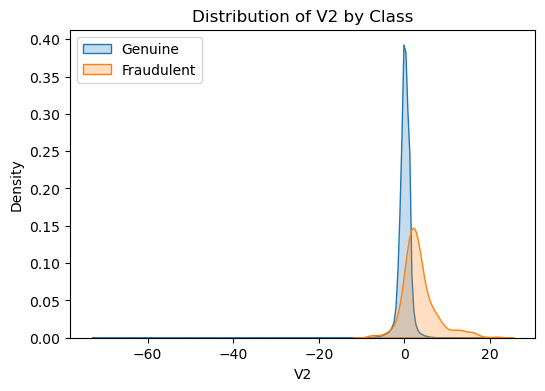

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 0], label = 'Genuine', shade = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 1], label = 'Fraudulent', shade = True)


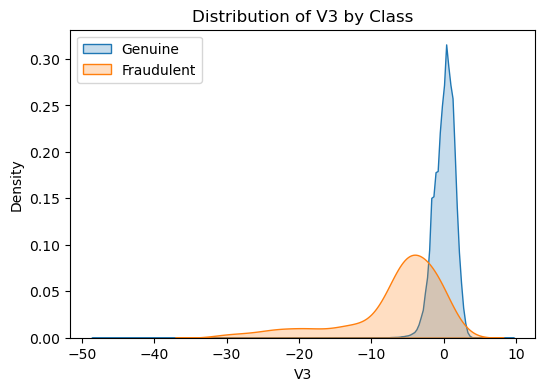

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 0], label = 'Genuine', shade = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\2646987180.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature][data['Class'] == 1], label = 'Fraudulent', shade = True)


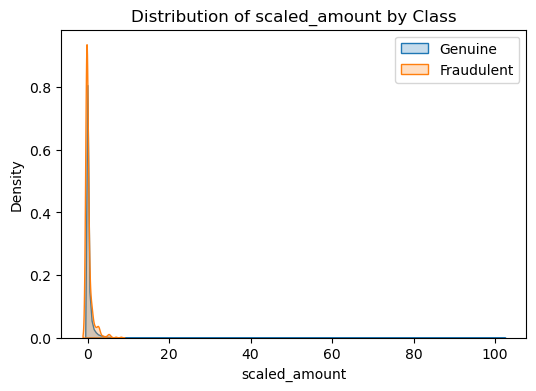

In [35]:
#Distribution plot for a few selected features
features = ['V1','V2','V3', 'scaled_amount']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data[feature][data['Class'] == 0], label = 'Genuine', shade = True)
    sns.kdeplot(data[feature][data['Class'] == 1], label = 'Fraudulent', shade = True)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

Box plot of Transaction Amount by Class

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\3294053883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='scaled_amount', data=data, palette='viridis')


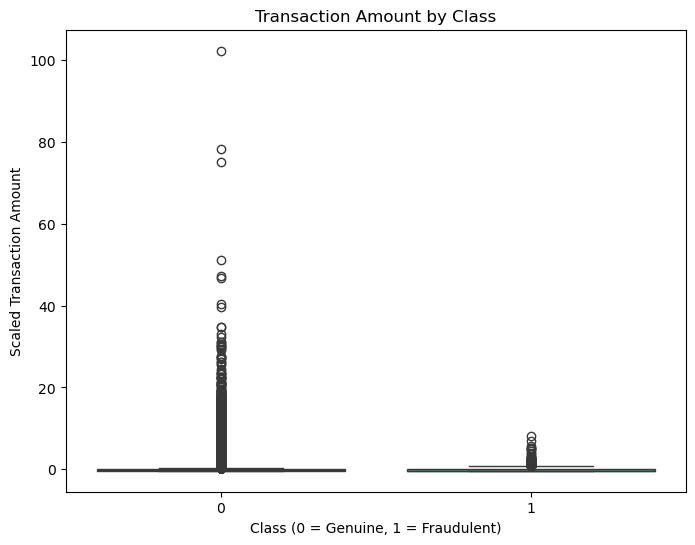

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='scaled_amount', data=data, palette='viridis')
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0 = Genuine, 1 = Fraudulent)')
plt.ylabel('Scaled Transaction Amount')
plt.show()


Distribution of Scaled Time Feature by Class

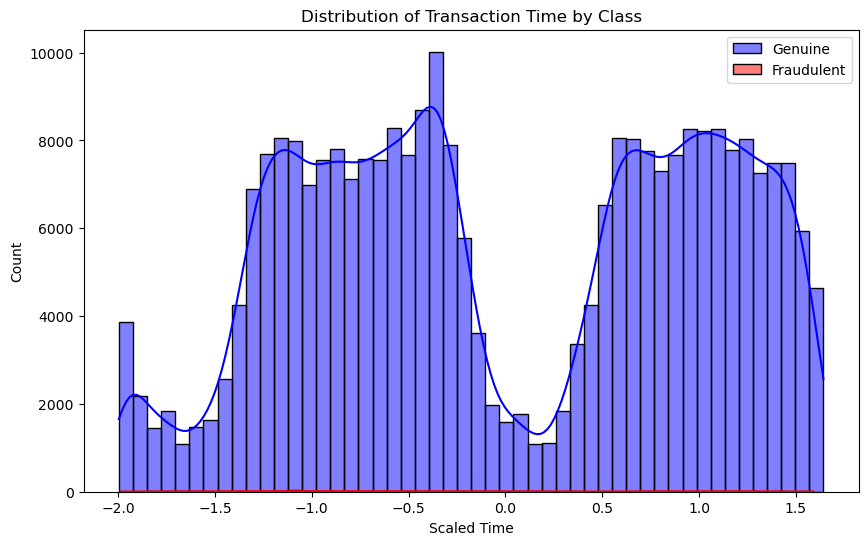

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['scaled_time'], bins=50, color='blue', label='Genuine', kde=True)
sns.histplot(data[data['Class'] == 1]['scaled_time'], bins=50, color='red', label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Time by Class')
plt.xlabel('Scaled Time')
plt.legend()
plt.show()


Pair Plot for Selected Features

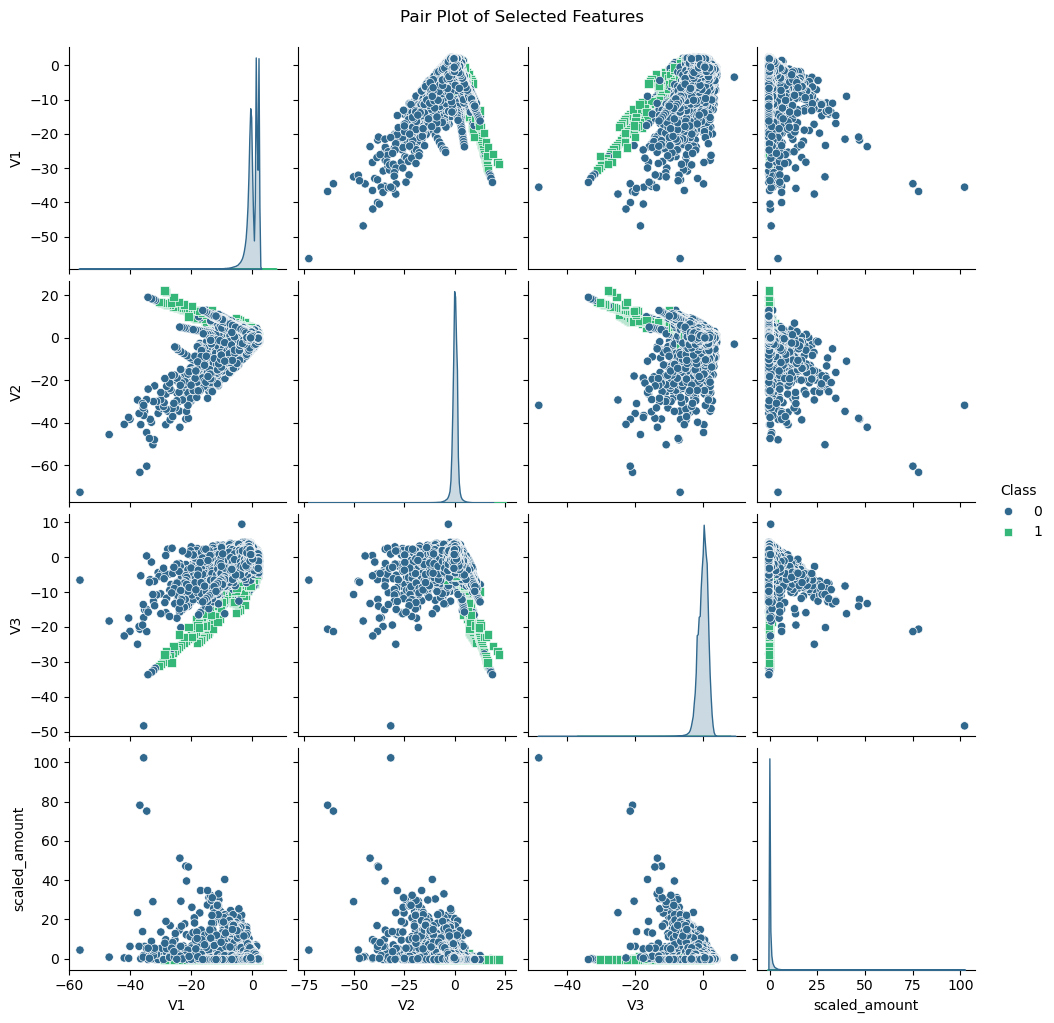

In [44]:
selected_features = ['V1', 'V2', 'V3', 'scaled_amount', 'Class']
sns.pairplot(data[selected_features], hue='Class', palette='viridis', markers=["o", "s"], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


Violin Plot of Feature Distributions by Class

C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\3171536603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=data, palette='muted')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\3171536603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=data, palette='muted')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\3171536603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=data, palette='muted')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1512\317

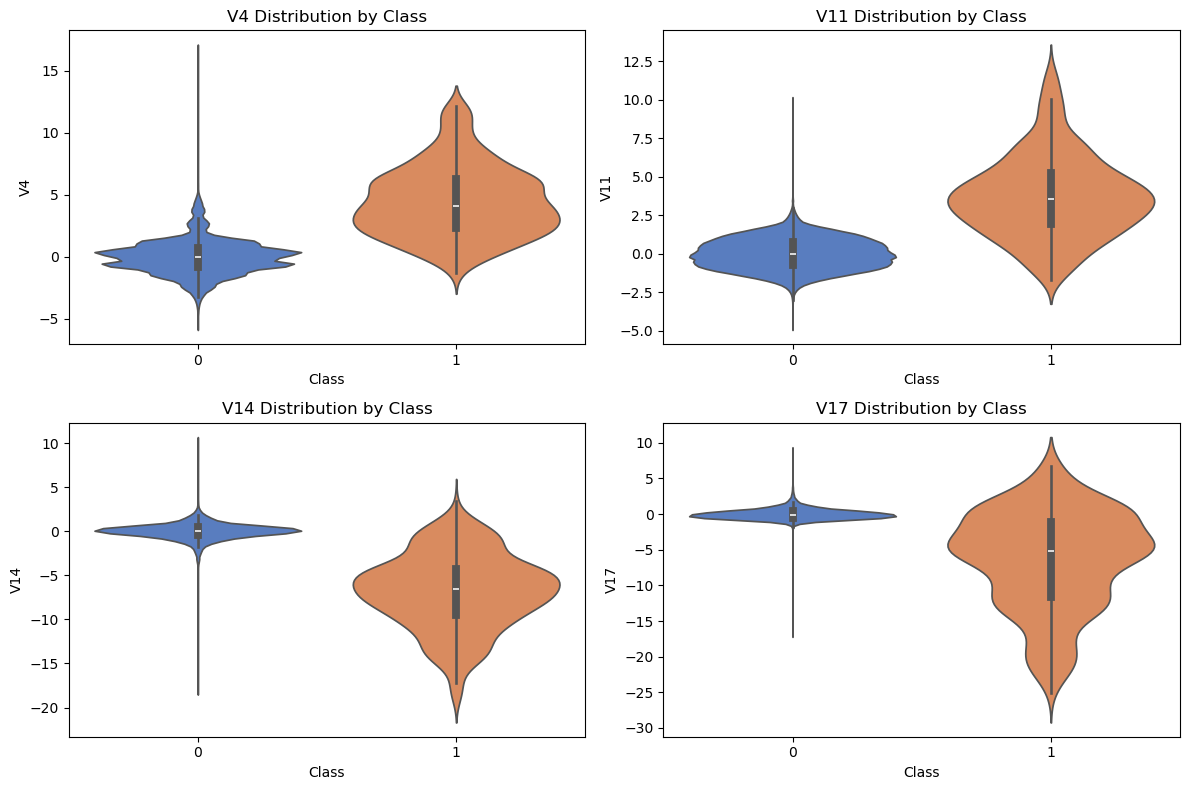

In [47]:
plt.figure(figsize=(12, 8))
features = ['V4', 'V11', 'V14', 'V17']  # Select features that you find significant
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Class', y=feature, data=data, palette='muted')
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


Heatmap of High Correlation Features

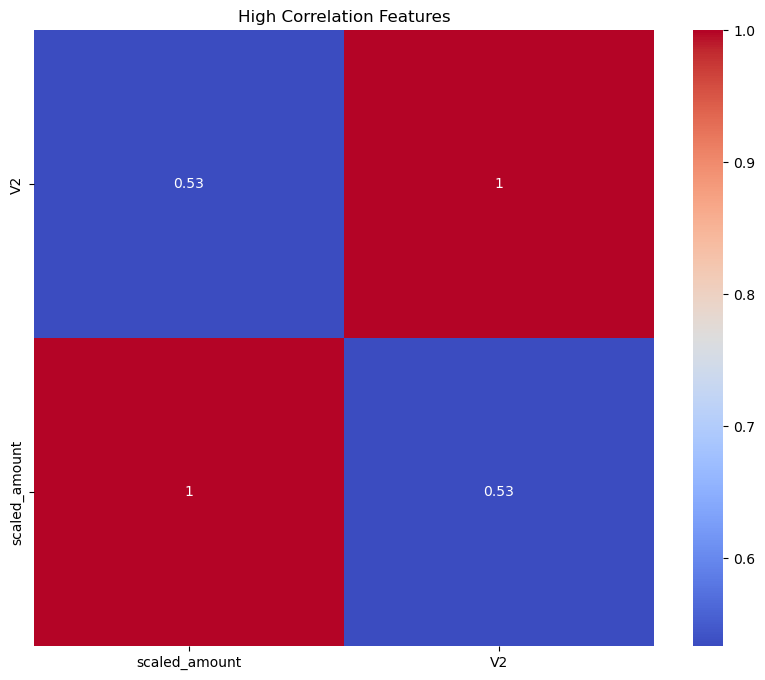

In [50]:
# Selecting features with high absolute correlations
corr_matrix = data.corr().abs()
high_corr_vars = corr_matrix[corr_matrix > 0.5].stack().reset_index()
high_corr_vars = high_corr_vars[high_corr_vars['level_0'] != high_corr_vars['level_1']]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[high_corr_vars['level_0'], high_corr_vars['level_1']], cmap='coolwarm', annot=True)
plt.title('High Correlation Features')
plt.show()


Count Plot of Feature Interactions

In [53]:
#Data Preparing and splitting
#Use train_test_split to divide the dataset into training and testing sets (typically 80/20 or 70/30 split).
from sklearn.model_selection import train_test_split
x = data.drop('Class', axis = 1)
y = data['Class']
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, stratify = y, random_state = 42)

In [55]:
#Addres class Imbalance 
#Apply Resampling Techniques: Oversampling the minority class using techniques like SMOTE (Synthetic Minority over-sampling Technique).
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [57]:
#feature Scaling : Normalize or Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_res = scaler.fit_transform(x_train_res)
x_test = scaler.transform(x_test)

In [59]:
#Model Selection and Training 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
lr = LogisticRegression(class_weight = 'balanced', random_state = 42)
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

#Train Models
lr.fit(x_train_res, y_train_res)
rf.fit(x_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [61]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [63]:
#Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred = rf.predict(x_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.9436161762369597


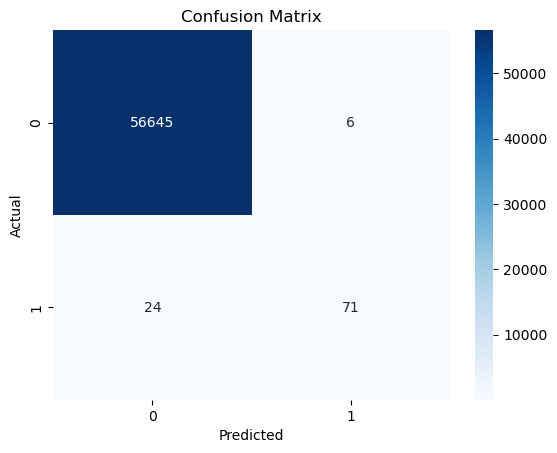

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


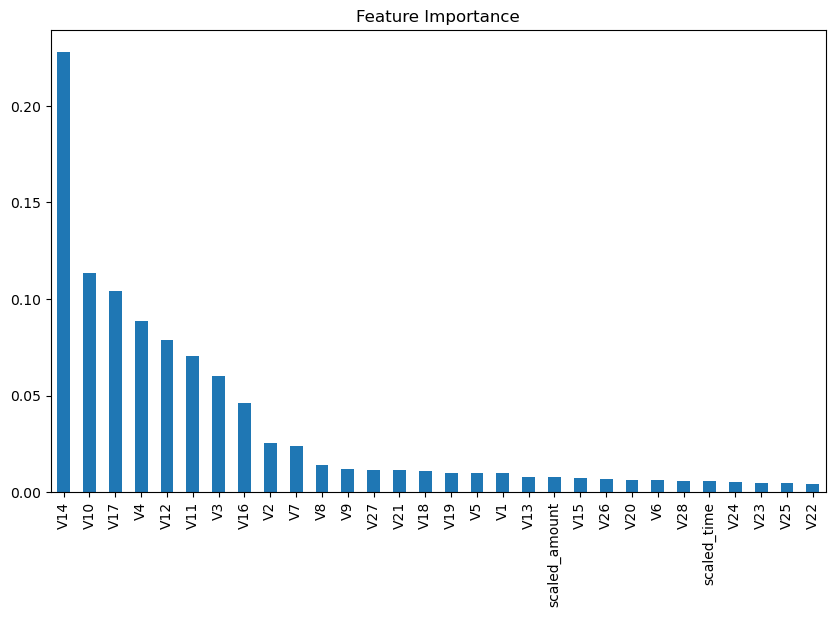

In [67]:
#Further Model Optimixation and Insights
importances = rf.feature_importances_
features = x.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


Cross-Validation
1. Perform cross-validation to better evaluate the model's performance across different subsets of the data. This provides a more reliable estimate of the model's generalization ability.

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the trained models
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Model Evaluation:
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

Confusion Matrix:
 [[55176  1475]
 [   12    83]]

Random Forest Model Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56645     6]
 [   24    71]]


In [90]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.4/124.9 MB 6.1 MB/s eta 0:00:21
   - -------------------------------------- 3.4/124.9 MB 5.6 MB/s eta 0:00:22
   - -------------------------------------- 4.5/124.9 MB 5.5 MB/s eta 0:00:22
   - -------------------------------------- 5.5/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 6.6/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 7.6/124.9 MB 5.2 MB/s eta 0:00:23
   -- ------------------------------------- 8.7/124.9 MB 5.2 MB/s eta 0:00:23
   --- ------------------------------------ 9.4/124.9 MB 5.2 MB/s eta 0:00:23
   --- ------------------------------------ 10.5/124.9 MB 5.2 MB/s eta 0:00:23
   --- ------------------------------------ 11.5/124.9 MB 5.2 MB/s eta 0:00:22
   ---- ----------------------------------- 12.6/124.9 MB 5.1 MB/s et

Model Implementation

In [92]:
# Import the XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the XGBoost model
xgb.fit(x_train_res, y_train_res)

# Predict using the trained model
y_pred_xgb = xgb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Model Accuracy: {accuracy:.2f}')

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.76      0.80      0.78        95

    accuracy                           1.00     56746
   macro avg       0.88      0.90      0.89     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56627    24]
 [   19    76]]


In [95]:
import joblib

# Save the best model
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [97]:
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Conclusion of the Performance of the XGBoost Model in Credit Card Fraud Prediction
Model Overall Accuracy:
1. This model achieves an incredible accuracy of 1.00 or 100%. Now, assuming that class is very imbalanced between fraudulent and non-fraudulent, that might be a sign of overfitting.
Precision, Recall, and F1 Score:
2. Precision Class 0 (non-fraudulent): 1.00 The model correctly predicts true positives and never commits any false positives for legitimate transactions.
3. Accuracy for Class 1 ( fraudulent ): 0.76 – it shows that out of the transactions predicted as fraudulent, 76% are actually fraud and the result is a small number of false positives.
4. Recall for Class 0: 1.00 – it captures all non-fraudulent transactions.
Recall for Class 1: 0.80 – it captures 80% of fraud transactions but misses 20% of them.
5. Class 1 F1-Score: 0.78 – This balanced measure of precision and recall of the minority class proves that the model is doing decently but has room to improve its ability to detect fraudulent cases.
Analysis of Confusion Matrix:
6. The confusion matrix illustrates:
True Negatives: 56627: Successfully identified as non-fraudulent transactions.
False Positives: 24: Cases where the model incorrectly marked legitimate transactions as fraudulent.
False Negatives: 19: The model failed to identify fraudulent transactions.
True Positives: 76: Successfully identified fraudulent transactions.
This even signifies that the model is very good at identifying non-fraudulent transactions but lags a bit in the identification of all the cases that are fraudulent.
7. Class Imbalance:
The dataset has a highly skewed class for the non-fraudulent versus the fraudulent transactions with a total count of 56651 against 95. This skewed class also contributes to why the model exhibits lower precision and recall for the class to be fraudulent, meaning the model will not generalize well for rare cases.
## Final Thoughts:
It performed well when detecting non-fraudulent transactions, and the improvement is that with respect to the minority class of fraudulent cases, it needs to be enhanced. Class balancing and hyperparameter tuning by way of enhancement will make this model improve utility in credit card fraud detection applications for real-world scenarios where detection becomes essential at whatever cost there are some false positives.